### Prevendo classes de animais ###

Essa base de dados contém 101 animais de um zoo.

Existem 16 variáveis com varias caracteristicas dos animais.

São 7 tipos de classes: 1- Mamiferos, 2- Pássaros, 3- Repteis, 4 - Peixes, 5 - Anfibios, 6 - Insetos e 7 - Invertebrados

* hair - se tem ou não pelos 
* feathers - se possui penas
* eggs - se bota ovos
* milk - se produz leite
* airbone - se voa
* aquatic - se é aquatico
* predator - se é predador
* toothed - se possui dentes
* backbone - se possui espinha dorsal
* breathes - se respira
* venomous - se é venenoso
* fins - se possui barbatanas
* legs - número de pernas
* tail - se possui cauda
* domestic - se é doméstico
* catsize - se é do tamanho de um gato
* class_type - classe do animal variando entre 1 a 7

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns

In [70]:
zoo = pd.read_csv('datasets/zoo.csv')
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [71]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


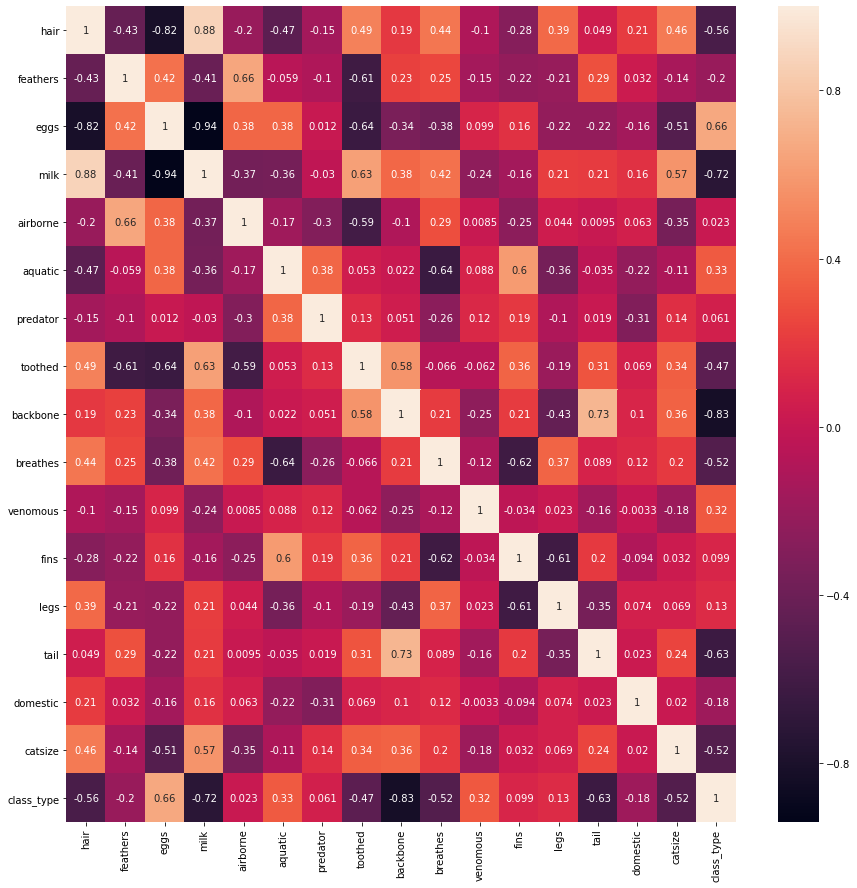

In [73]:
# Correlação entre as caracteristicas dos animais
zoo_corr = zoo.corr()
plt.figure(figsize=(15,15))
sns.heatmap(zoo_corr, annot=True)
plt.show()

# Vemos que existe uma forte correlação negativa entre animais que botam ovos e produzem leite (ou seja são opostos -94%)
# Existe também uma alta correlação entre animais que possuem Cauda e Espinha Dorsal (73%) e animais com penas e que voam (66%)

In [74]:
# Vamos remover a coluna nome do animal (não será usada nessa predição)
zoo = zoo.drop("animal_name", axis=1)

No gráfico acima, vemos que existem muitos animais com a classificação mamiferos e aves, precisamos equilibrar nossa base para treinar o modelo corretamente

In [75]:
X = zoo.drop("class_type", axis=1)
y = zoo.class_type

In [35]:
# Realizando o UnderSampling (Esse procedimento equilibra as diferentes classes do modelo)
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler()
X, y = us.fit_resample(X,y)

In [76]:
# Verificando o balanceamento das classes 
y.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [77]:
# Separando o modelo entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [78]:
# Treinando o modelo com Regressão Logistica
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\users\rapha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [102]:
# Regressão Logistica com Lambda = 1
lr = LogisticRegression(C=1).fit(X_train, y_train)
print(f"Resultado de treinamento: {lr.score(X_train, y_train)}")
print(f"Resulado do teste: {lr.score(X_test, y_test)}")

Resultado de treinamento: 1.0
Resulado do teste: 0.9615384615384616


c:\users\rapha\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [80]:
y_predito = lr.predict(X_test)
y_predito

array([1, 1, 1, 4, 1, 4, 1, 1, 2, 6, 1, 4, 3, 2, 1, 1, 1, 5, 4, 1, 2, 2,
       2, 6, 4, 2], dtype=int64)

### Prevendo resultados na base de animais brasileiros ###

In [81]:
# Prevendo em produção 
zoo2 = pd.read_csv('datasets/zoo_br.csv')
zoo2.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [82]:
# Vamos remover a coluna class_type e deixar o algoritmo tentar prever
zoo2 = zoo2.drop("class_type", axis=1)

In [83]:
zoo2.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [86]:
previsao = lr.predict(zoo2.iloc[:, 1:17])
previsao

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 7, 5, 3, 3,
       4, 7, 3, 4, 4, 4, 4, 4, 4, 4, 4, 7, 5, 7, 7, 5, 5, 6, 6, 6, 6, 6,
       6, 7, 6, 6], dtype=int64)

In [93]:
zoo2['classe_predita']= previsao
zoo2

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,classe_predita,categorias
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1,None
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1,None
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,None
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,None
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6,None
66,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,None
67,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,None
68,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,6,None


In [94]:
categorias = ['Mamiferos','Pássaros','Repteis','Peixes','Anfíbios','Insetos','Invertebrados']
zoo2['categorias'] = zoo2['classe_predita'].replace(to_replace=[1,2,3,4,5,6,7], value=categorias)

In [95]:
zoo2

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,classe_predita,categorias
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1,Mamiferos
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1,Mamiferos
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1,Mamiferos
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1,Mamiferos
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mamiferos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6,Insetos
66,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,Insetos
67,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,Invertebrados
68,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,6,Insetos


In [ ]:
# Exportando a base finalizada
zoo2.to_csv('datasets/resultados_previstos.csv', sep=';', encoding='iso-8859-1')